In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pydicom
import tabula
import warnings
from pydicom.data import get_testdata_files
from PIL import Image

In [16]:
image_path = "../data/curated/drsprg/DATA_DICOM/drsprg_002/drsprg_002_ANT.dcm"
dcm_img = pydicom.dcmread(image_path)

In [17]:
dcm_img.pixel_array.shape

(180, 128, 128)

In [23]:
dir(dcm_img)

['AccessionNumber',
 'AcquisitionDate',
 'AcquisitionTerminationCondition',
 'AcquisitionTime',
 'BitsAllocated',
 'BitsStored',
 'BodyPartExamined',
 'Columns',
 'ContentDate',
 'ContentTime',
 'CountRate',
 'CountsAccumulated',
 'DeidentificationMethod',
 'DetectorInformationSequence',
 'DetectorVector',
 'EnergyWindowInformationSequence',
 'EnergyWindowVector',
 'FrameIncrementPointer',
 'FrameOfReferenceUID',
 'HighBit',
 'ImageID',
 'ImageType',
 'InstanceCreationDate',
 'InstanceCreationTime',
 'InstanceNumber',
 'InstitutionName',
 'LargestImagePixelValue',
 'Manufacturer',
 'ManufacturerModelName',
 'Modality',
 'NumberOfDetectors',
 'NumberOfEnergyWindows',
 'NumberOfFrames',
 'NumberOfPhases',
 'PatientBirthDate',
 'PatientGantryRelationshipCodeSequence',
 'PatientID',
 'PatientIdentityRemoved',
 'PatientName',
 'PatientOrientationCodeSequence',
 'PatientPosition',
 'PatientSex',
 'PhaseInformationSequence',
 'PhaseVector',
 'PhotometricInterpretation',
 'PixelData',
 'PixelR

In [19]:
image = dcm_img.pixel_array.astype(float)[0]
image = (np.maximum(image, 0) / image.max()) * 255
image = np.uint8(image)
image = Image.fromarray(image)

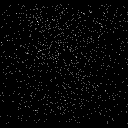

In [20]:
image

In [21]:
dcm_img.values

<bound method Dataset.values of Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 226
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Nuclear Medicine Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.9590.100.1.2.293462424511965304535207174474291808649
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.3.6.1.4.1.9590.100.1.3.100.7.1
(0002, 0013) Implementation Version Name         SH: 'MATLAB IPT 7.1'
(0002, 0016) Source Application Entity Title     AE: 'XELERIS'
-------------------------------------------------
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'DYNAMIC', 'EMISSION']
(0008, 0012) Instance Creation Date              DA: '20091007'
(0008, 0013) Instance Creation Time              TM: '075314.0000'
(0008, 0016) SO